In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#Oversampling
from imblearn.over_sampling import SMOTE
#Data splitting
from sklearn.model_selection import train_test_split
#Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# This code is designed to be run on Google Collab.
1. Open this notebook on google collab
2. Upload `urldata_processed.csv` onto Colab Notebooks in your google drive.
3. 

# Importing Processed Data

In [ ]:
# loading out dataset from previous notebook
urldata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/urldata_processed_new.csv")

# droping "Unnamed: 0" as its unncessary feature
urldata.drop("Unnamed: 0",axis=1,inplace=True)
#urldata.drop(["url","label","path_length", 'count:"', "count:#"],axis=1,inplace=True)

urldata.tail(10)

,url,label,result,url_length,hostname_length,path_length,first_directory_length,count:!,"count:""",count:#,...,count:&,count:',count:http,count:https,count:www,count:digits,count:letters,count:directories,count:casechanges,ip_present
450166,http://businessmobilewebapp.com/jobi/dh/dhl.htm,malicious,1,47,24,16,4,0,0,0,...,0,0,1,0,0,0,39,3,0,0
450167,http://bishopinegypt.gdn/wp-database/wp-databa...,malicious,1,56,17,32,11,0,0,0,...,0,0,1,0,0,1,45,3,0,0
450168,http://boasecg7.beget.tech/cgi-bin/index/pcg/f...,malicious,1,72,19,46,7,0,0,0,...,0,0,1,0,0,7,52,7,0,0
450169,http://gangainsulations.com/alert/GD/,malicious,1,37,20,10,5,0,0,0,...,0,0,1,0,0,0,30,3,1,0
450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,10,26,8,0,0,0,...,0,0,1,1,0,5,31,3,2,0
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,11,25,8,0,0,0,...,0,0,1,0,0,0,34,3,0,0
450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,13,139,2,0,0,0,...,0,0,1,0,0,21,118,12,10,0
450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,13,127,2,0,0,0,...,0,0,1,0,0,20,109,12,10,0
450174,http://atualizapj.com/,malicious,1,22,14,1,0,0,0,0,...,0,0,1,0,0,0,17,1,0,0
450175,http://writeassociate.com/test/Portal/inicio/I...,malicious,1,143,18,118,4,0,0,0,...,0,0,1,0,1,9,118,7,42,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   url                     450176 non-null  object
 1   label                   450176 non-null  object
 2   result                  450176 non-null  int64 
 3   url_length              450176 non-null  int64 
 4   hostname_length         450176 non-null  int64 
 5   path_length             450176 non-null  int64 
 6   first_directory_length  450176 non-null  int64 
 7   count:!                 450176 non-null  int64 
 8   count:"                 450176 non-null  int64 
 9   count:#                 450176 non-null  int64 
 10  count:$                 450176 non-null  int64 
 11  count:%                 450176 non-null  int64 
 12  count:&                 450176 non-null  int64 
 13  count:'                 450176 non-null  int64 
 14  count:http              450176 non-n

# EDA

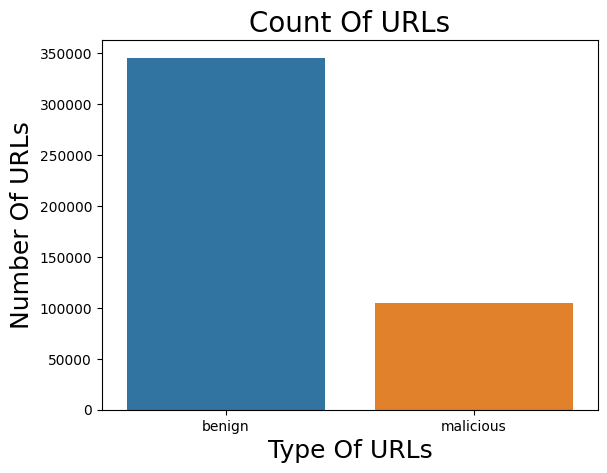

In [ ]:
#Plot of benign and malicious URLs
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

<ipython-input-24-458ff07b58dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = urldata.corr()


<Axes: >

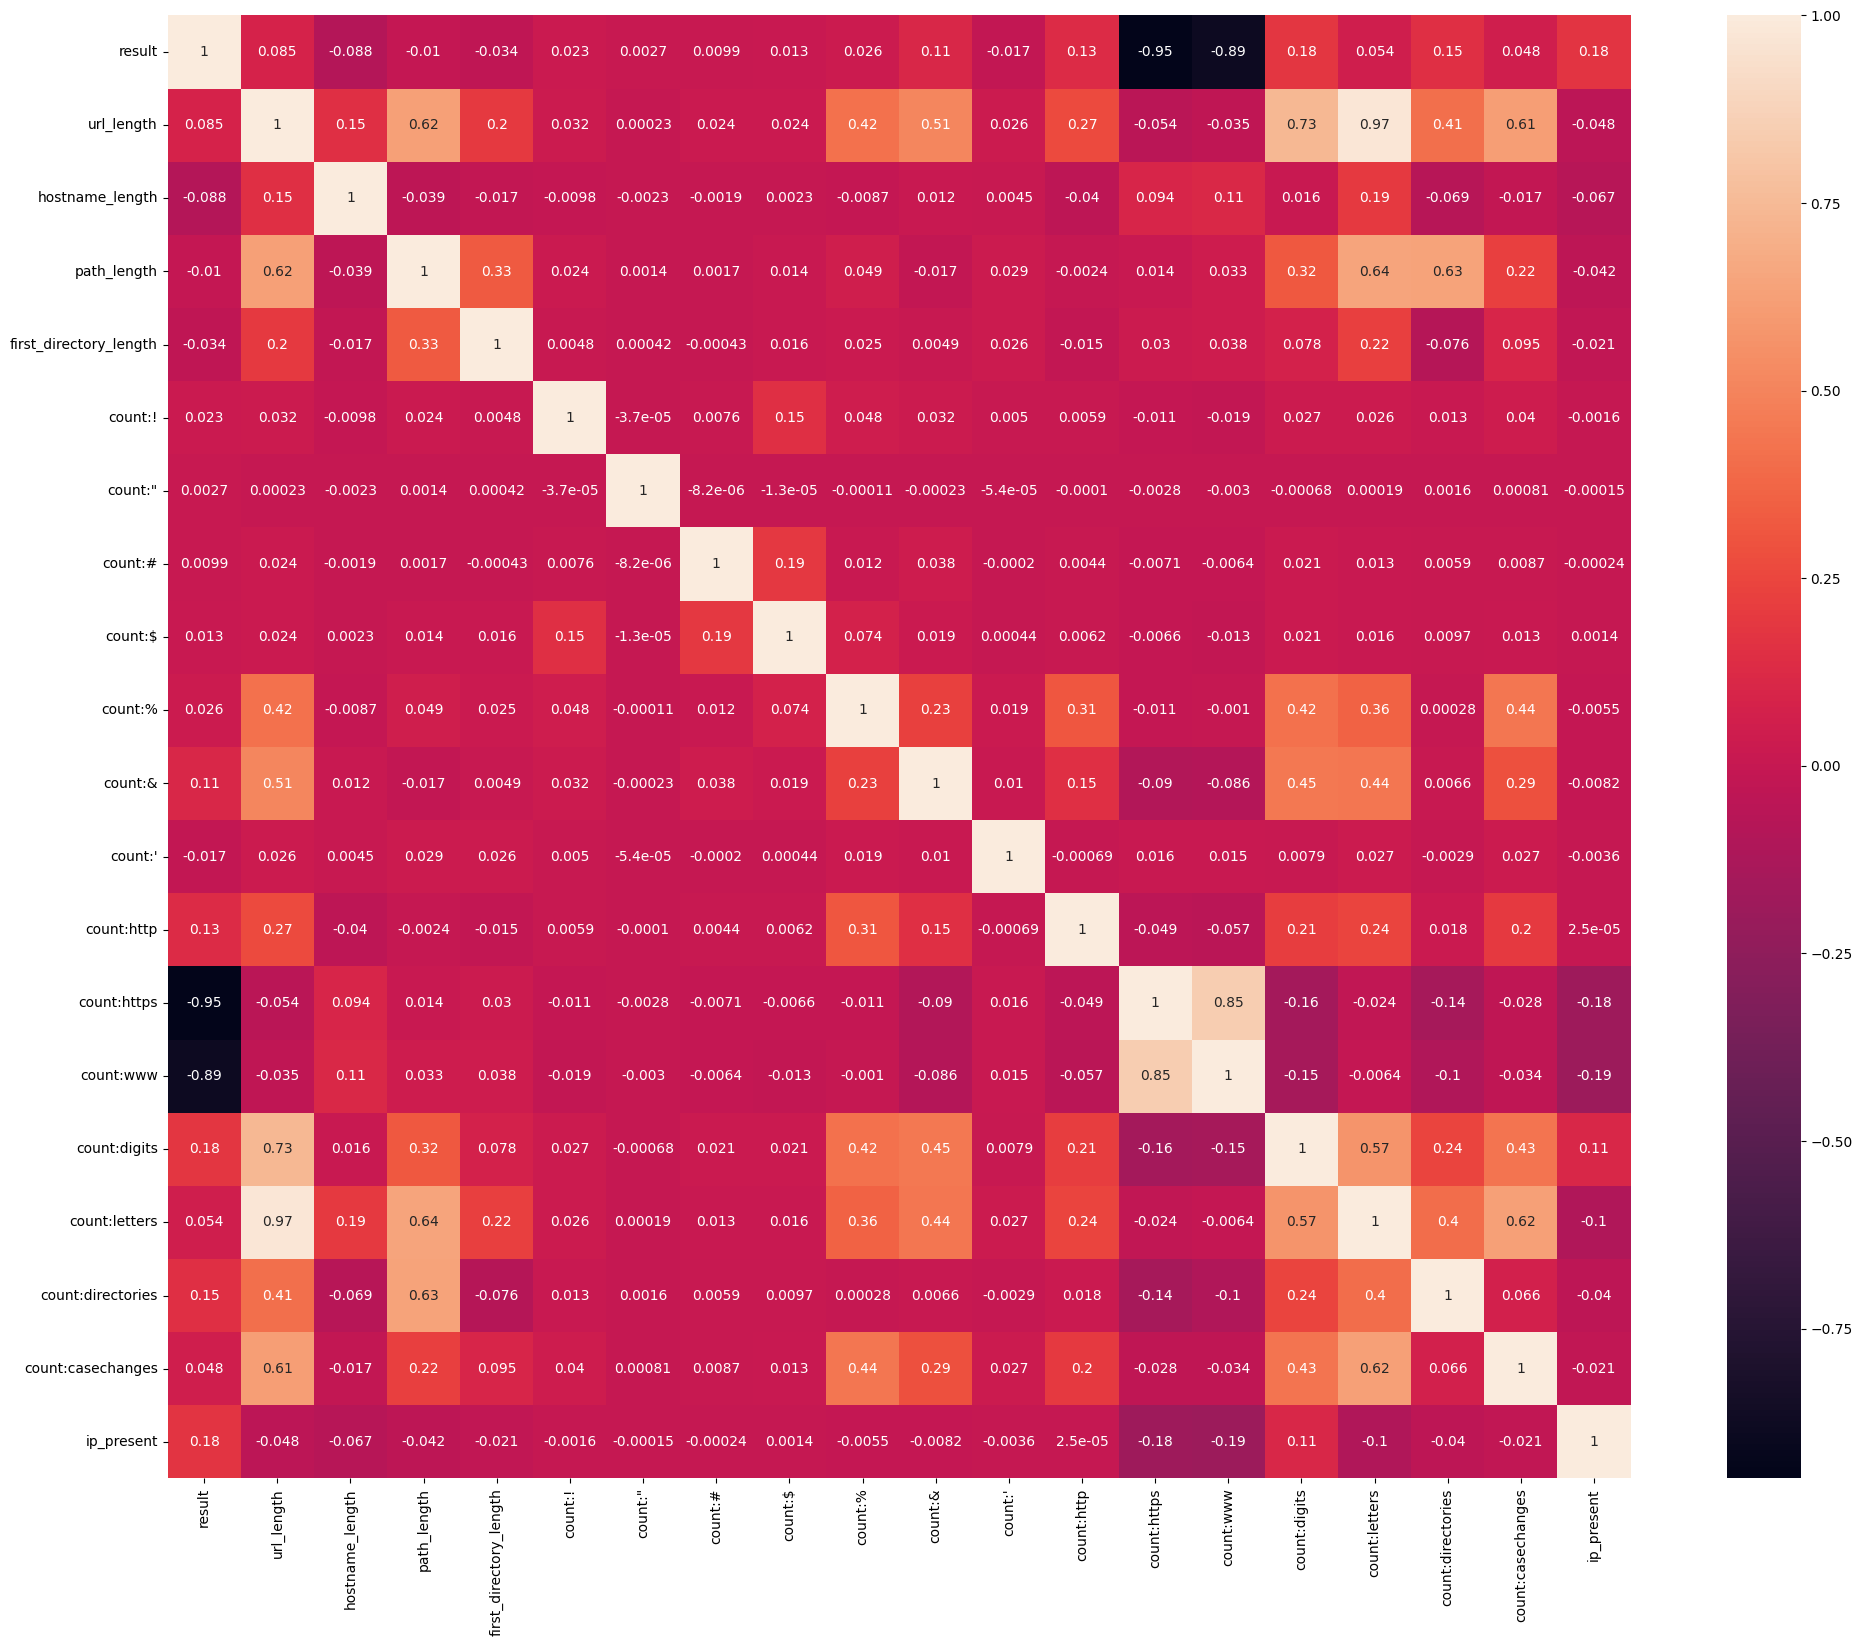

In [ ]:
#Correlation Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

In [ ]:
# Check for NaN values in the correlation matrix
nan_values = corrmat.isna().sum()

# Print the columns with NaN values
print("Columns with NaN values in the correlation matrix:")
print(nan_values[nan_values > 0])

Columns with NaN values in the correlation matrix:
Series([], dtype: int64)


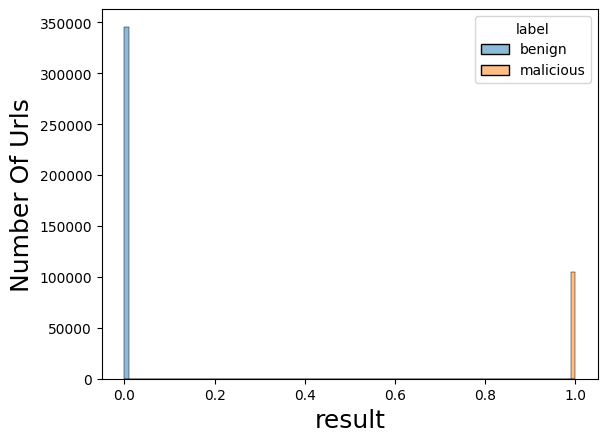

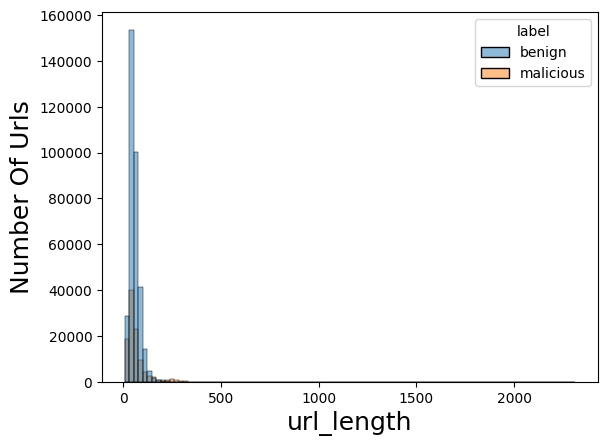

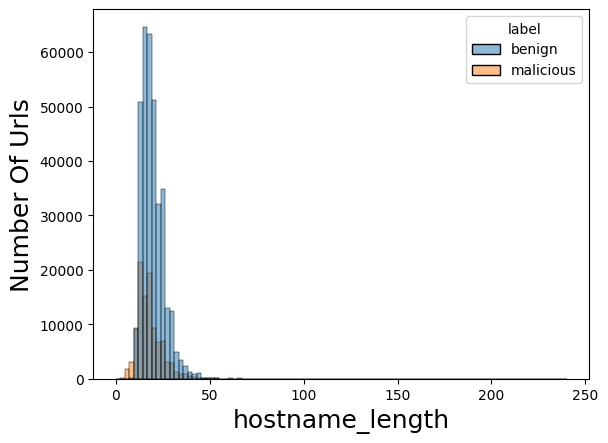

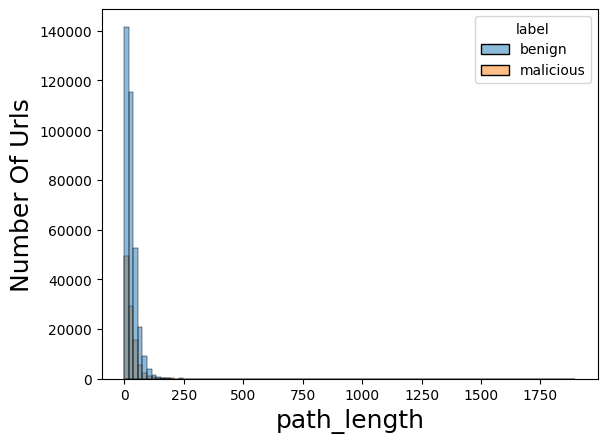

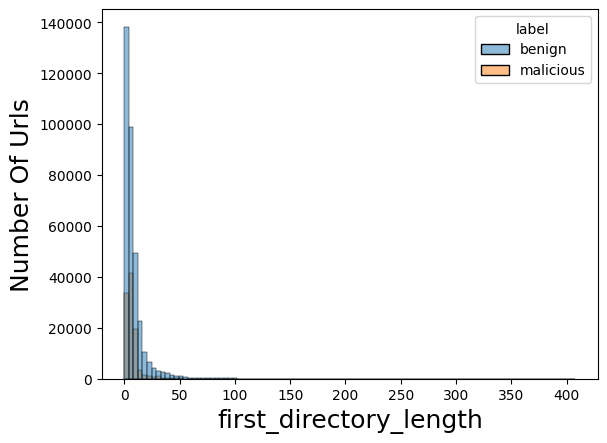

In [ ]:
# plotting distrubutions
features = list(urldata.columns) # list of feature names



hist_features = ["result","url_length","hostname_length","path_length","first_directory_length"]

for i in hist_features:
   sns.histplot(data=urldata,x=i,bins=100,hue='label')
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   #plt.xlim(0,10)
   #plt.ylim(0,0.25)
   plt.show()

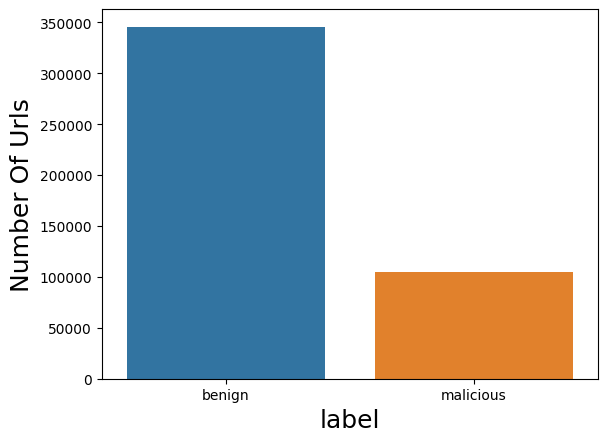

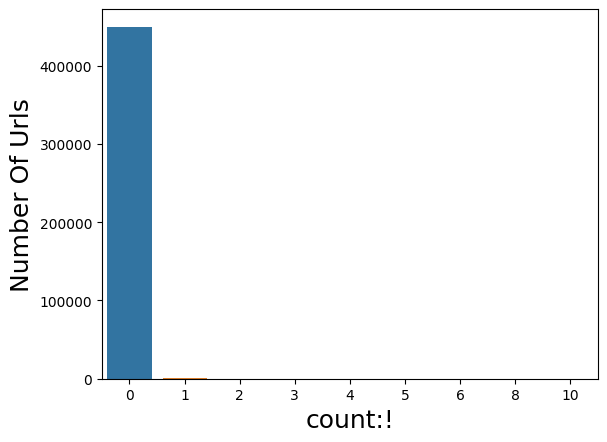

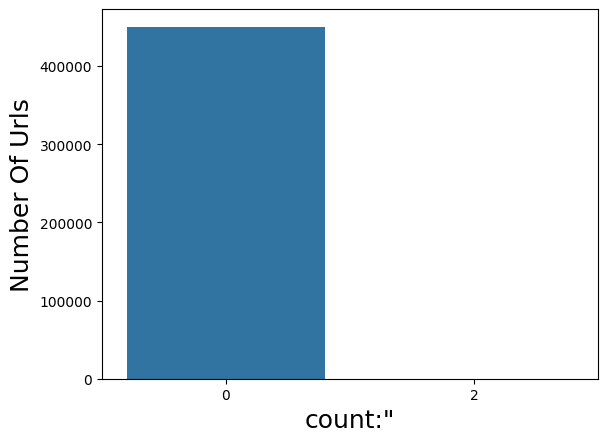

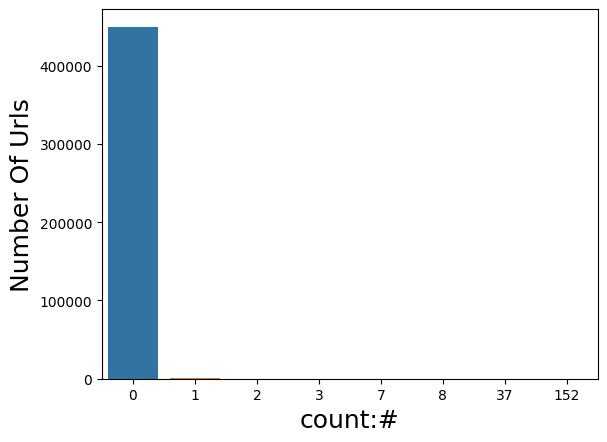

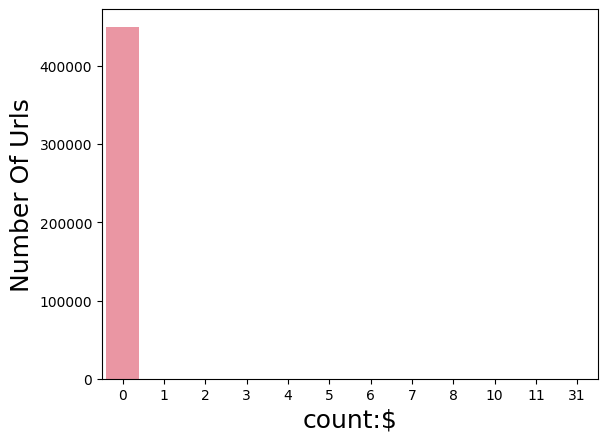

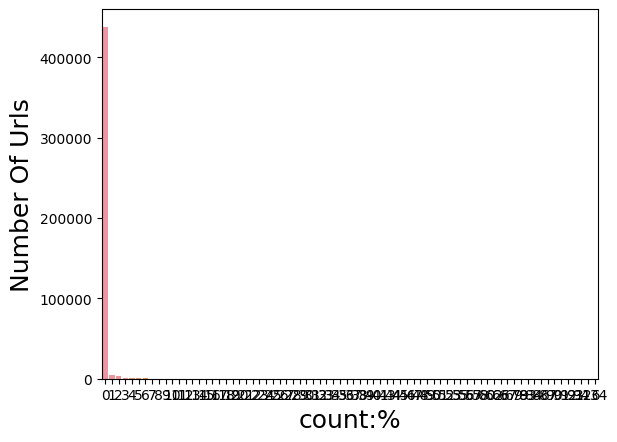

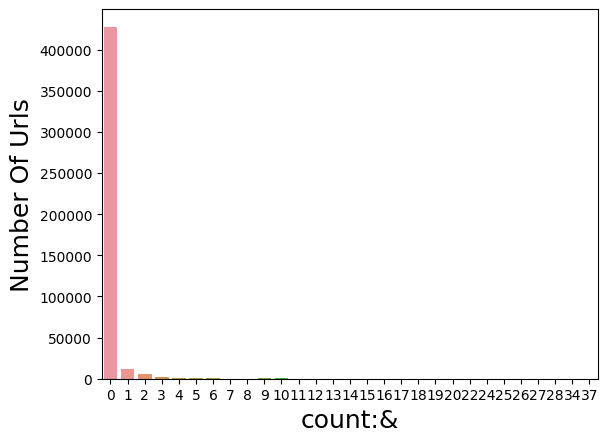

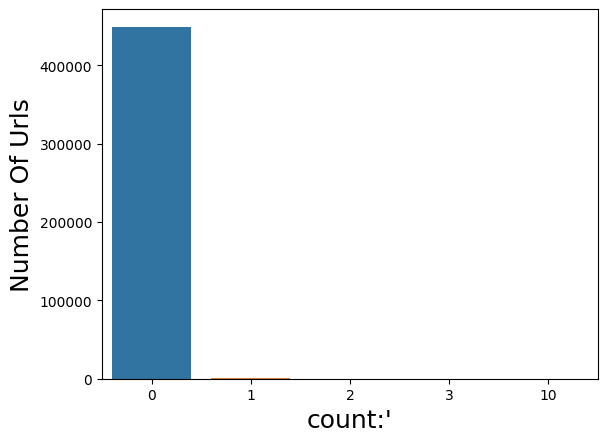

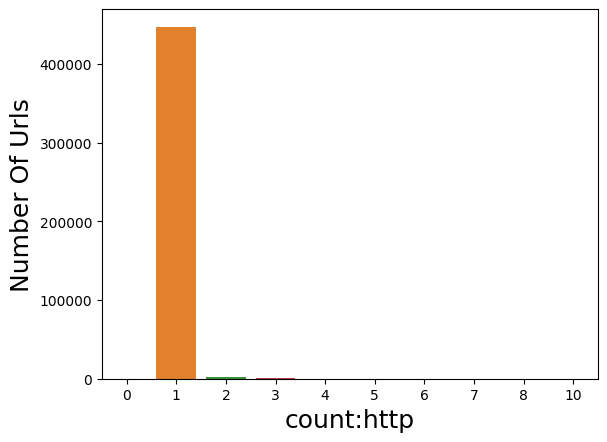

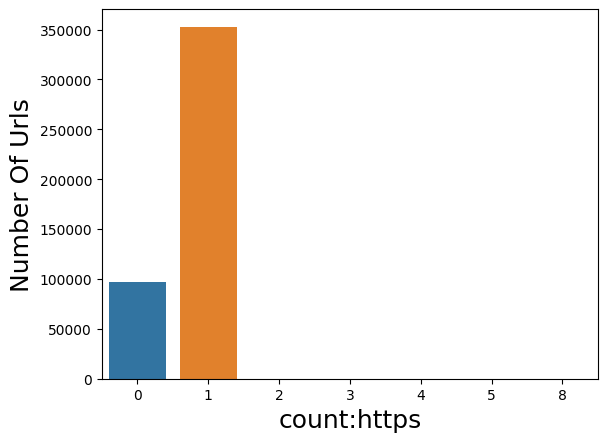

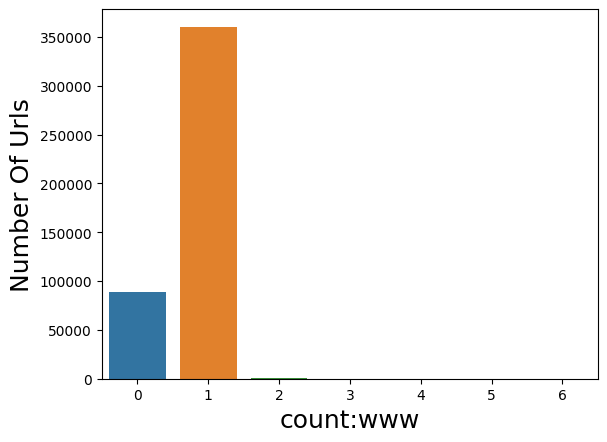

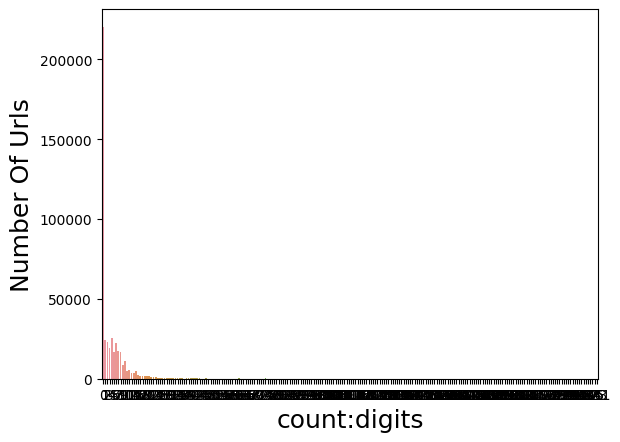

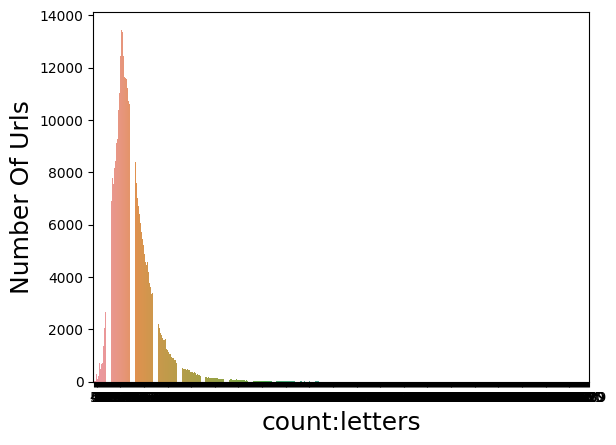

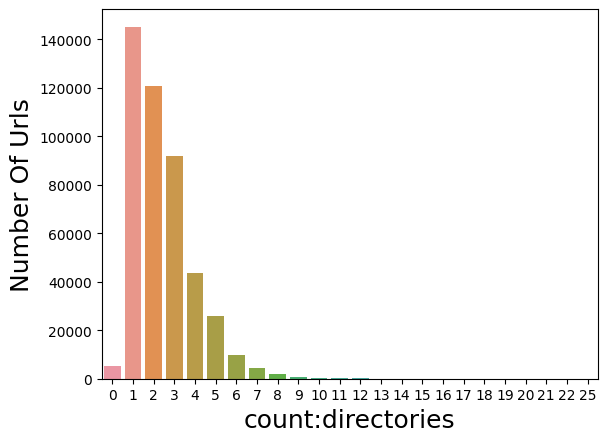

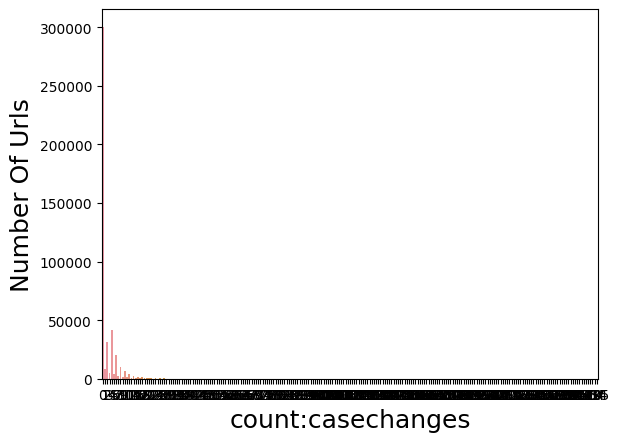

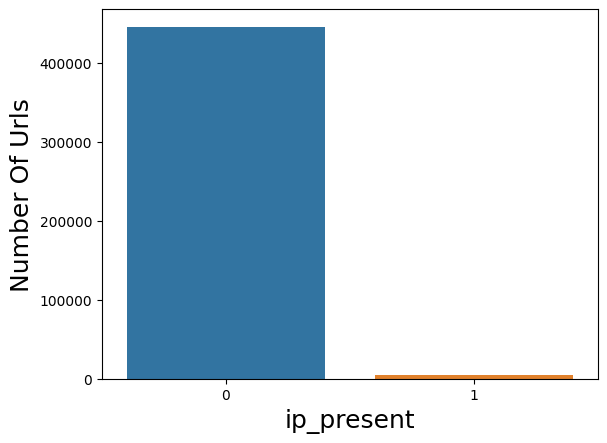

In [ ]:
# plotting distrubutions

features = list(urldata.columns) # list of feature names
features.remove("url")


for i in features:

   if i in hist_features:
     continue

   sns.countplot(x=i,data=urldata)
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.show()

## Conclusion: Data is imbalanced, we need to balance it when training model

# Training model

## Data Splitting
80:20 splitting for train:test data

In [ ]:
urldata.drop(["url","label","path_length", 'count:"', "count:#"],axis=1,inplace=True)

urldata.head()

,result,url_length,hostname_length,first_directory_length,count:!,count:$,count:%,count:&,count:',count:http,count:https,count:www,count:digits,count:letters,count:directories,count:casechanges,ip_present
0,0,22,14,0,0,0,0,0,0,1,1,1,0,17,0,0,0
1,0,23,15,0,0,0,0,0,0,1,1,1,0,18,0,0,0
2,0,24,16,0,0,0,0,0,0,1,1,1,0,19,0,0,0
3,0,21,13,0,0,0,0,0,0,1,1,1,0,16,0,0,0
4,0,25,17,0,0,0,0,0,0,1,1,1,0,20,0,0,0


In [ ]:
# NOTE : Not taking 'url_length' and 'short_url'

#Independent Variables
lst=list(urldata.columns)
lst.remove("result")
x = urldata[lst]

#Dependent Variable
y = urldata['result']

In [ ]:
lst=list(urldata.columns)
lst.remove("result")
print(lst)

['url_length', 'hostname_length', 'first_directory_length', 'count:!', 'count:$', 'count:%', 'count:&', "count:'", 'count:http', 'count:https', 'count:www', 'count:digits', 'count:letters', 'count:directories', 'count:casechanges', 'ip_present']


In [ ]:
x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

In [ ]:
#We now have equal benign and malicious
y_sample.value_counts()

0    345738
1    345738
dtype: int64

In [ ]:
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 16)
Shape of x_valid:  (138296, 16)
Shape of y_train:  (553180, 1)
Shape of y_valid:  (138296, 1)


In [ ]:
x_train

,url_length,hostname_length,first_directory_length,count:!,count:$,count:%,count:&,count:',count:http,count:https,count:www,count:digits,count:letters,count:directories,count:casechanges,ip_present
328657,82,12,5,0,0,0,0,0,1,1,1,0,64,2,0,0
534194,58,20,5,0,0,0,0,0,1,0,0,1,45,2,6,0
564276,44,16,7,0,0,0,0,0,1,0,0,0,35,5,0,0
617068,57,19,6,0,0,0,0,0,1,0,0,1,46,3,2,0
536597,61,12,6,0,0,0,0,0,1,0,0,0,50,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253411,62,18,5,0,0,0,0,0,1,1,1,0,52,3,0,0
259641,32,15,8,0,0,0,0,0,1,1,1,2,24,1,0,0
372200,78,21,9,0,0,0,0,0,1,0,0,3,63,5,4,0
527120,30,15,7,0,0,0,0,0,1,0,0,4,20,1,0,0


# MLP Deep Learning Model

In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (16, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compiling model
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [ ]:
# custom callback to stop the training when certain metric value is reached

# stop training when validation loss reach 0.1
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.0001):
            print("\nReached 0.0001 val_loss so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

In [ ]:
# start training the model
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
2161/2161 [==============================] - 6s 2ms/step - loss: 0.0900 - acc: 0.9699 - val_loss: 0.0213 - val_acc: 0.9960
Epoch 2/10
2161/2161 [==============================] - 4s 2ms/step - loss: 0.0222 - acc: 0.9958 - val_loss: 0.0305 - val_acc: 0.9943
Epoch 3/10
2161/2161 [==============================] - 4s 2ms/step - loss: 0.0192 - acc: 0.9964 - val_loss: 0.0188 - val_acc: 0.9962
Epoch 4/10
2161/2161 [==============================] - 5s 2ms/step - loss: 0.0193 - acc: 0.9962 - val_loss: 0.0168 - val_acc: 0.9968
Epoch 5/10
2161/2161 [==============================] - 4s 2ms/step - loss: 0.0180 - acc: 0.9965 - val_loss: 0.0188 - val_acc: 0.9964
Epoch 6/10
2161/2161 [==============================] - 4s 2ms/step - loss: 0.0173 - acc: 0.9965 - val_loss: 0.0155 - val_acc: 0.9969
Epoch 7/10
2161/2161 [==============================] - 5s 2ms/step - loss: 0.0170 - acc: 0.9966 - val_loss: 0.0181 - val_acc: 0.9959
Epoch 8/10
2161/2161 [==============================] - 4s 2ms

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


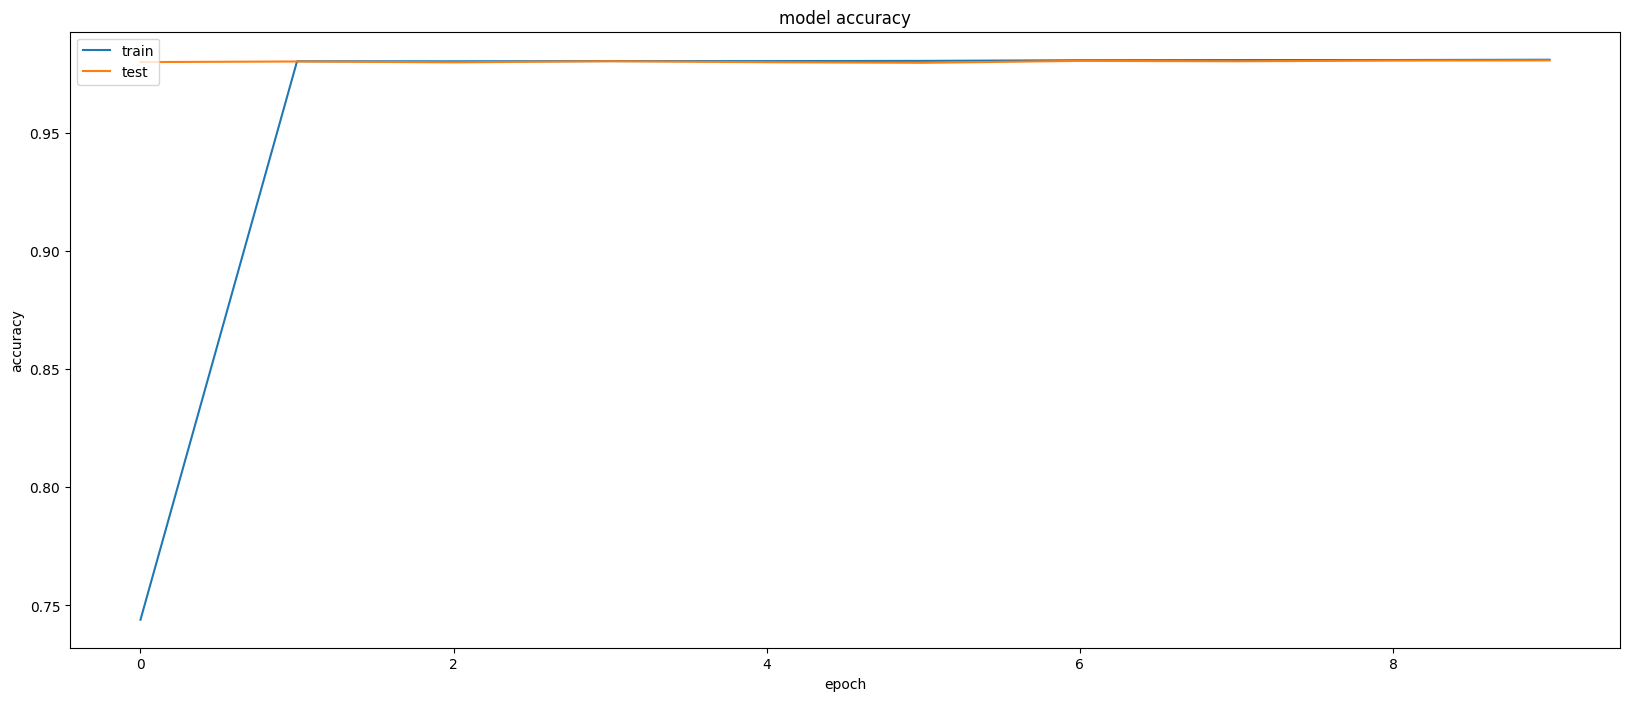

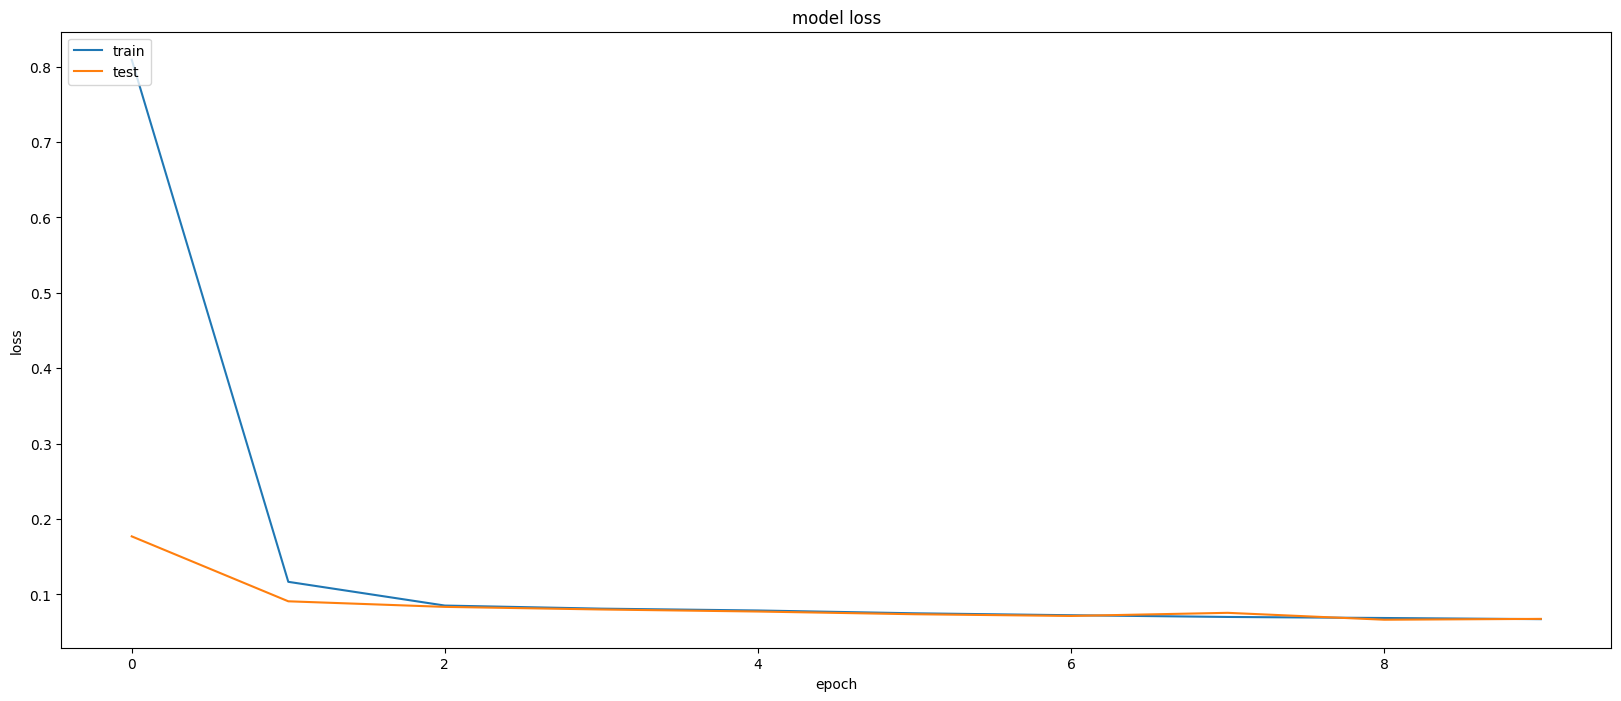

In [ ]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))


4322/4322 [==============================] - 5s 1ms/step - loss: 0.0186 - acc: 0.9958
Test loss: 0.018579935654997826
Test Accuracy: 0.9958494901657104


In [ ]:
# Save Model Weights and Architecture Together
model.save("idk_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# IDK - Internet Defense Knight